<a href="https://colab.research.google.com/github/SalmanRadhitya/Data-Mining/blob/main/Tugas2_014_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree

In [2]:
!wget https://raw.githubusercontent.com/SalmanRadhitya/Data-Mining/refs/heads/main/heart.csv

--2024-11-06 14:30:44--  https://raw.githubusercontent.com/SalmanRadhitya/Data-Mining/refs/heads/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35921 (35K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  35.08K  --.-KB/s    in 0.002s  

2024-11-06 14:30:45 (21.5 MB/s) - ‘heart.csv’ saved [35921/35921]



In [4]:
heartdf= pd.read_csv("heart.csv")
heartdf

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [20]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [21]:
print(heartdf.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Melakukan Tranformasi Data

In [22]:
heartdf.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


In [23]:
# prompt: tranformasikan tipe data diatas dengan benar sesuai dengan variabel yang ada

# Mengubah tipe data 'object' menjadi 'category'
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    heartdf[col] = heartdf[col].astype('category')

# Mengubah tipe data kolom 'HeartDisease' menjadi 'int64'
heartdf['HeartDisease'] = heartdf['HeartDisease'].astype('int64')

# Menampilkan tipe data setelah transformasi
heartdf.dtypes

,0
Age,int64
Sex,category
ChestPainType,category
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,category
MaxHR,int64
ExerciseAngina,category
Oldpeak,float64


berikut adalah data yang sudah ditranformasikan sesuai dengan type datanya

In [24]:
heartdf

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


Membuat Visualisasi data yang ada di dataset tersebut

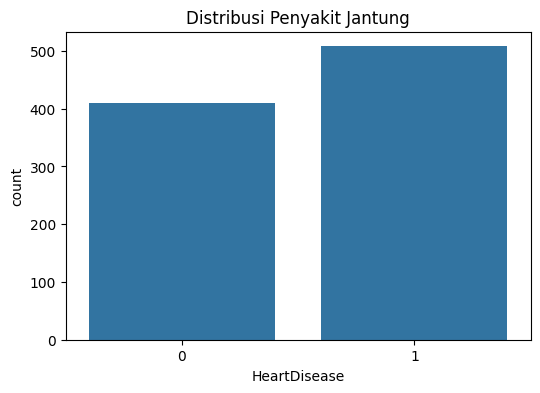

In [27]:
# Visualisasi distribusi HeartDisease
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=heartdf)
plt.title('Distribusi Penyakit Jantung')
plt.show()

# Penjelasan:
# Visualisasi ini menunjukkan distribusi penyakit jantung (HeartDisease) dalam dataset.
# Sumbu x merepresentasikan status penyakit jantung, di mana 0 menunjukkan tidak adanya penyakit jantung dan 1 menunjukkan adanya penyakit jantung.
# Sumbu y menunjukkan jumlah pasien untuk setiap kategori penyakit jantung.
# Dari visualisasi ini, kita dapat melihat proporsi pasien dengan dan tanpa penyakit jantung dalam dataset.
#  Ini membantu untuk memahami sebaran kelas target dan dapat memberikan gambaran awal tentang keseimbangan data.

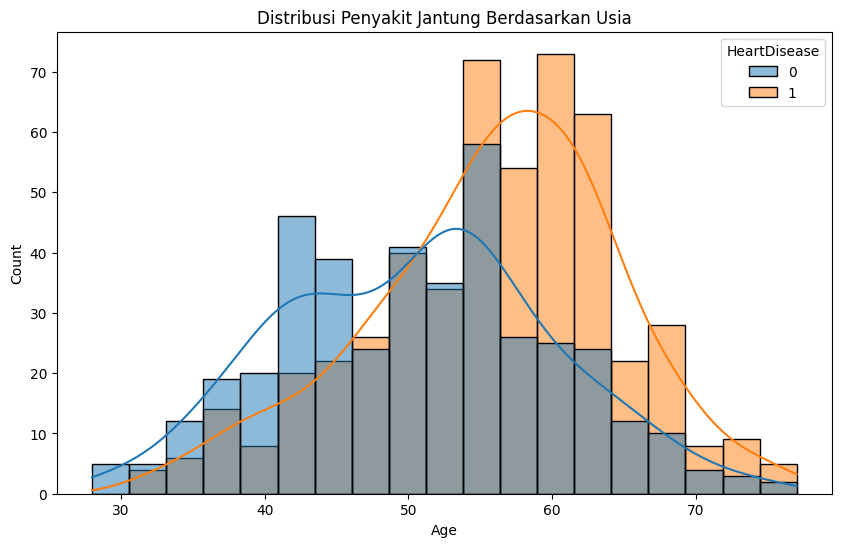

In [28]:
# Visualisasi distribusi HeartDisease berdasarkan Age
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='HeartDisease', data=heartdf, kde=True)
plt.title('Distribusi Penyakit Jantung Berdasarkan Usia')
plt.show()

# Penjelasan: Visualisasi ini membandingkan distribusi usia pasien dengan dan tanpa penyakit jantung.
# Kita dapat melihat apakah ada perbedaan rentang usia yang signifikan antara kedua kelompok.
# Box plot menunjukkan median, kuartil bawah dan atas, serta outlier dari usia pasien



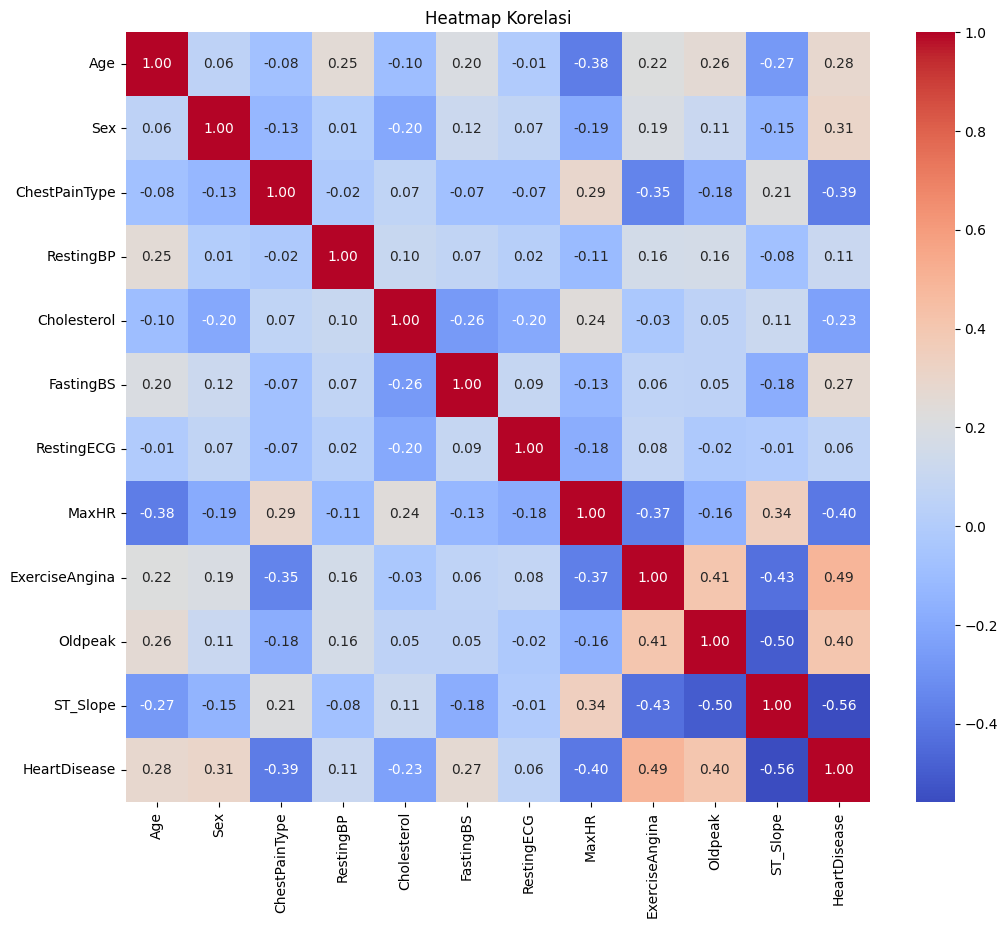

In [29]:
# Korelasi Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heartdf.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

# Penjelasan: Heatmap ini menunjukkan korelasi antar variabel dalam dataset.
# Nilai korelasi berkisar antara -1 hingga 1, dimana 1 menunjukkan korelasi positif sempurna,
# -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi.
# Warna yang lebih hangat (merah) menunjukkan korelasi positif yang kuat, sementara warna yang lebih dingin (biru) menunjukkan korelasi negatif yang kuat.
# Korelasi yang mendekati nol menunjukkan hubungan yang lemah.
# Hal penting untuk diperhatikan adalah bahwa korelasi tidak sama dengan kausalitas.

Akurasi: 0.782608695652174
Confusion Matrix:
[[64 13]
 [27 80]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.75      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184



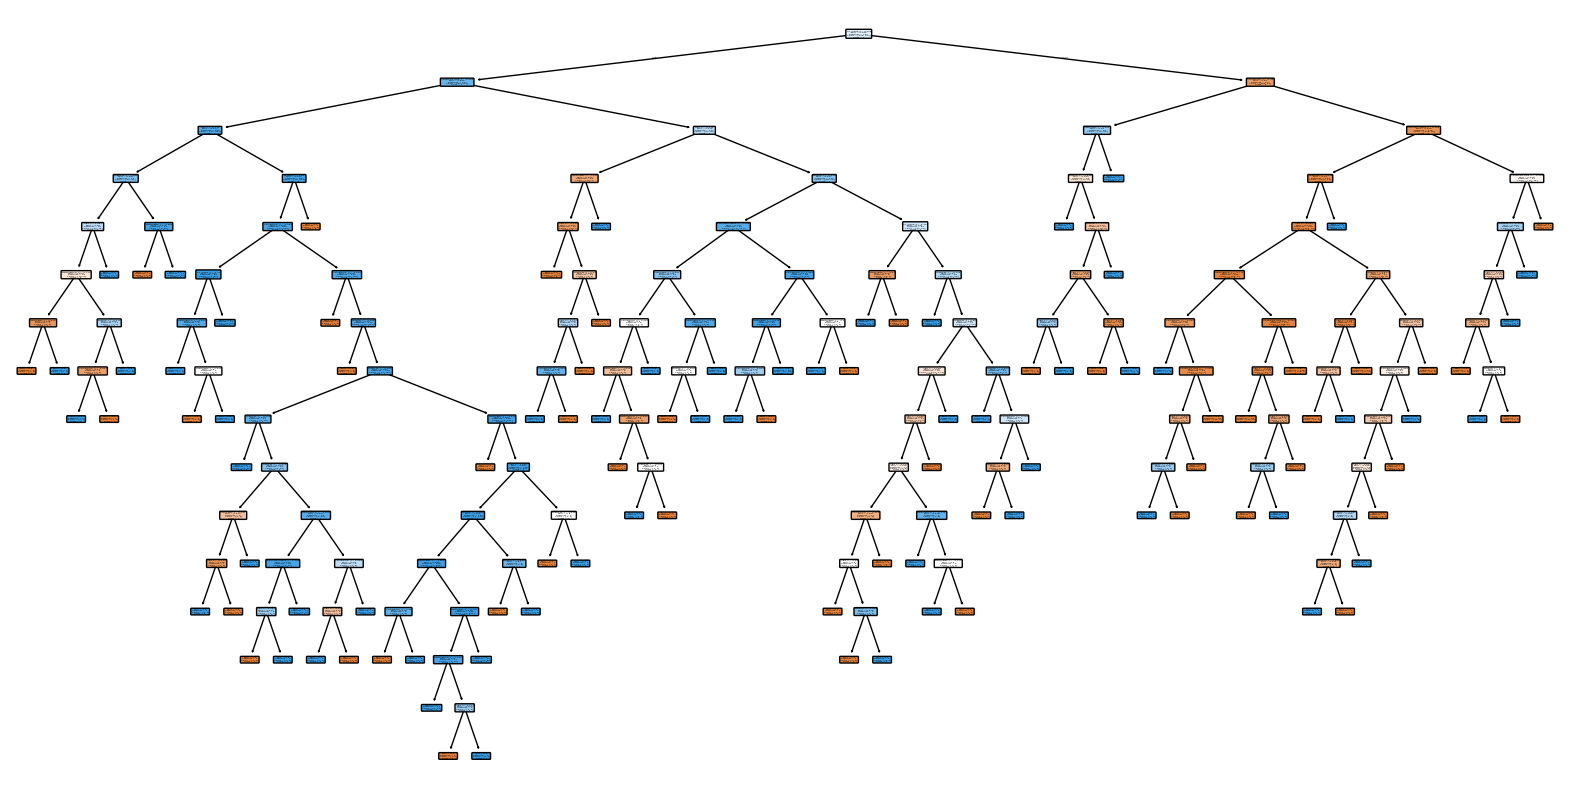

In [26]:
# Pisahkan fitur (X) dan target (y)
X = heartdf.drop('HeartDisease', axis=1)
y = heartdf['HeartDisease']

# Encoding fitur kategorikal
categorical_cols = X.select_dtypes(include=['category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scaling fitur numerik
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)  # Anda dapat menyesuaikan parameter di sini
dt_classifier.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = dt_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")
print(classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Tidak Ada Penyakit Jantung', 'Ada Penyakit Jantung'], rounded=True)
plt.show()


# Penjelasan langkah-langkah:

# 1. Persiapan Data:
#    - Memisahkan fitur (X) dan target (y).
#    - Melakukan encoding pada fitur kategorikal menggunakan LabelEncoder.  Ini mengubah kategori (misalnya, 'Male', 'Female') menjadi angka (misalnya, 0, 1).
#    - Melakukan scaling pada fitur numerik menggunakan StandardScaler. Ini mengubah skala fitur numerik agar memiliki mean 0 dan deviasi standar 1.  Langkah ini penting karena beberapa algoritma machine learning sensitif terhadap skala data.
#    - Membagi data menjadi data latih (untuk melatih model) dan data uji (untuk menguji performa model).

# 2. Pelatihan Model:
#    - Membuat objek DecisionTreeClassifier.  Parameter `random_state` digunakan untuk memastikan hasil yang sama setiap kali kode dijalankan.
#    - Melatih model dengan menggunakan data latih (X_train dan y_train) dengan method `fit()`.

# 3. Prediksi:
#    - Melakukan prediksi pada data uji (X_test) dengan method `predict()`.

# 4. Evaluasi:
#    - Menghitung akurasi model menggunakan `accuracy_score()`. Akurasi menunjukkan proporsi prediksi yang benar.
#    - Menampilkan laporan klasifikasi yang berisi precision, recall, f1-score, dan support untuk masing-masing kelas.
#       - Precision: Dari semua prediksi positif, berapa banyak yang benar?
#       - Recall: Dari semua sampel positif sebenarnya, berapa banyak yang berhasil diprediksi positif?
#       - F1-score: Rata-rata harmonis dari precision dan recall.
#       - Support: Jumlah sampel sebenarnya untuk setiap kelas.

# 5. Visualisasi:
#    - Menggunakan `plot_tree()` untuk memvisualisasikan pohon keputusan. `feature_names` memberikan label fitur pada setiap node, `class_names` memberikan label kelas, dan `filled=True` mewarnai node berdasarkan kelas mayoritas.  Visualisasi ini memperlihatkan bagaimana model memutuskan klasifikasi berdasarkan fitur-fitur.